### **Problem Statement**
- How we can use social media platform  like Facebook for sselling our products and which one is best type for selling (Video, Photos,Status,links etc)

## **Dataset description**
In this project, I have used Facebook Live Sellers in Thailand Dataset, downloaded from the UCI Machine Learning repository. The dataset can be found at the following url-

https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand
<i>
- The dataset consists of Facebook pages of 10 Thai fashion and cosmetics retail sellers.
- The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).
- It also contains engagement metrics of comments, shares and reactions.

## **Import libraries**

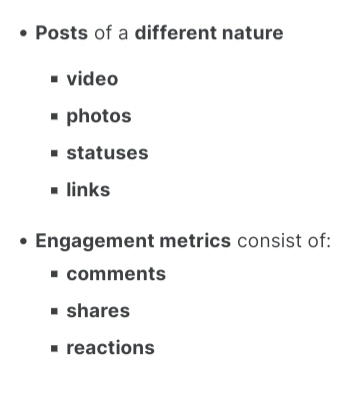

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <b>Import dataset

In [ ]:
df = pd.read_csv("/content/Facebook Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


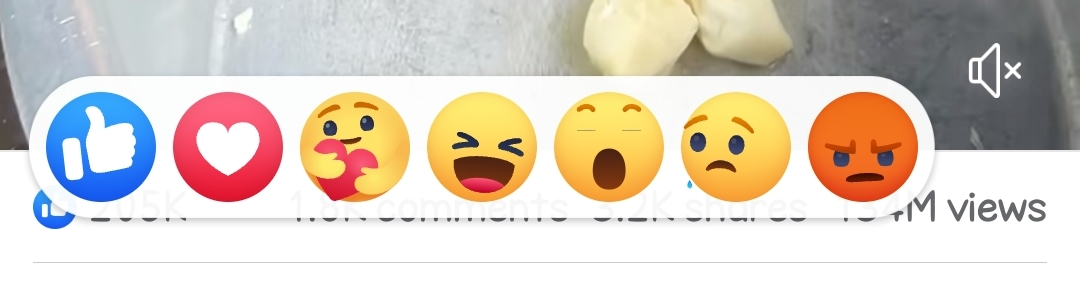

## <b>Exploratory data analysis

In [ ]:
df.shape

(7050, 16)

<b> <i>
- I can see that there are 7050 instances and 16 attributes in the dataset. In the dataset description, it is given that there are 7051 instances and 12 attributes in the dataset.

- So, I can infer that the first instance is the row header and there are 4 extra attributes in the dataset. Next..

In [ ]:
# View summary of dataset
df.info()

In [ ]:
# Check for missing values in dataset-
df.isnull().sum()

- <b>I can see that there are 4 redundant columns in the dataset. I should drop them before proceeding further.



In [ ]:
# Drop redundant columns-
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
df.info()

- <b>Now, I can see that redundant columns have been removed from the dataset.

- I can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64).



In [ ]:
# View the statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

- I can see that there are **6997** unique labels in the **status_id** variable.
- The total number of instances in the dataset is 7050.
- So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that I can use.
- isliye, I will drop it.



In [ ]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

- Again, I can see that there are **6913** unique labels in the **status_published** variable.
- The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that I can use. Hence, I will drop it also.

In [ ]:
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

- <b>I can see that there are 4 categories of labels in the status_type variable.



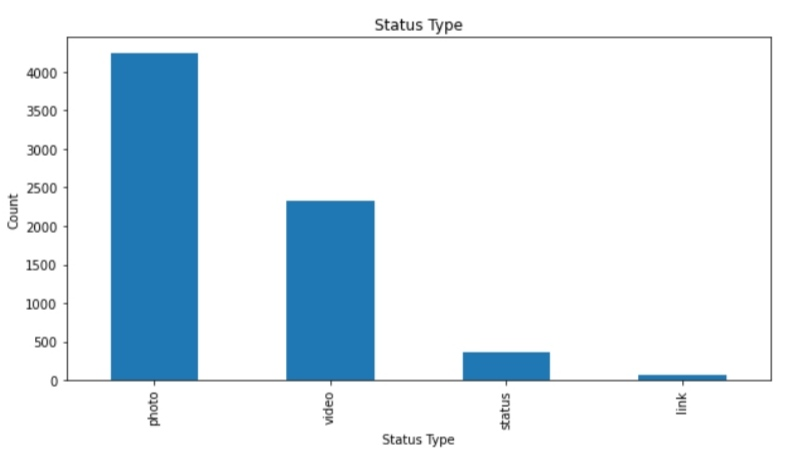

Most of the sellers seem to be using a photo or video as status for the selling. A tiny portion of the users is depending on text status or URL/link for posting an advertisement.

<B> Drop status_id and status_published variable from the dataset


In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

# I can see that there is 1 non-numeric column status_type in the dataset.
# I will convert it into integer equivalents.

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


## <B>Declare feature vector and target variable

In [ ]:
X = df

y = df['status_type']

<b>Convert categorical variable into integers

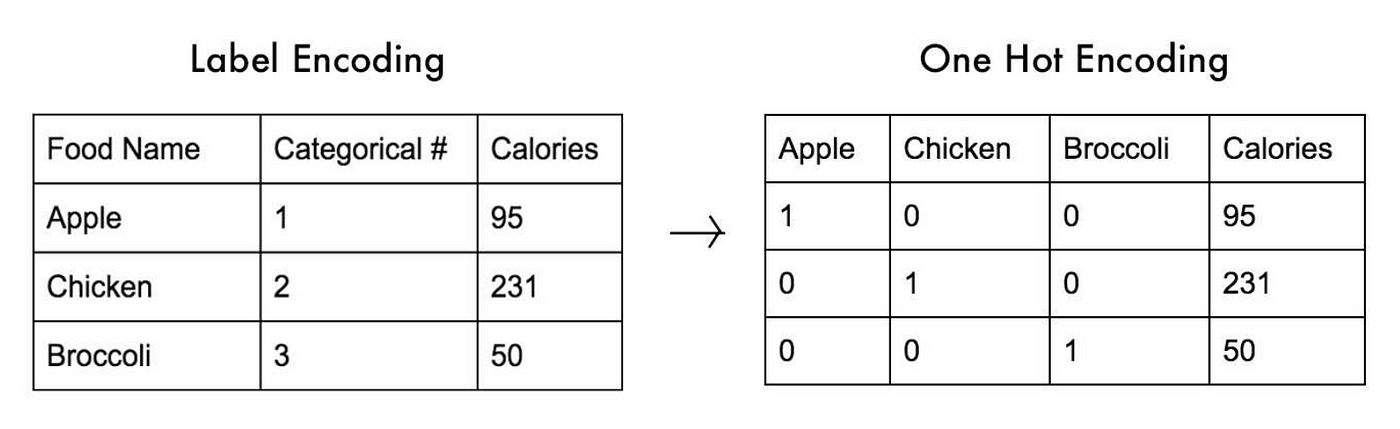

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [ ]:
X.info()

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## <b>Feature Scaling

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### **Assumptions of K-means:**

- **Clusters Are Spherical:** K-means assumes that clusters are spherical in shape, meaning they are roughly symmetrical around their centroids.
- **Similar Variance:** It assumes that clusters have similar variance. This means that the spread of data points around the centroid is approximately the same for all clusters.
- **Equal Prior Probabilities:**K-means assumes that all clusters have equal prior probabilities, meaning each cluster is equally likely to occur.
- **Independence of Features:** It assumes that the features used for clustering are independent of each other. In other words, the value of one feature does not depend on the value of another feature.
- **Linear Separability:** K-means works best when the clusters are linearly separable, meaning they can be separated by straight lines or hyperplanes in the feature space.

## <B> K-Means model with two clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

<b>K-Means model parameters study

In [ ]:
kmeans.cluster_centers_

<B>

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.



<b> Inertia

- Inertia is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).




In [ ]:
# I can calculate model inertia as follows:-

kmeans.inertia_

237.75726404419646

- The lesser the model inertia, the better the model fit.

- I can see that the model has very high inertia. So, this is not a good model fit to the data.

## <b>Check quality of weak classification by the model

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


<b>We have achieved a weak classification accuracy of 1% by our unsupervised model.



## <b>Use Elbow method to find optimal number of clusters

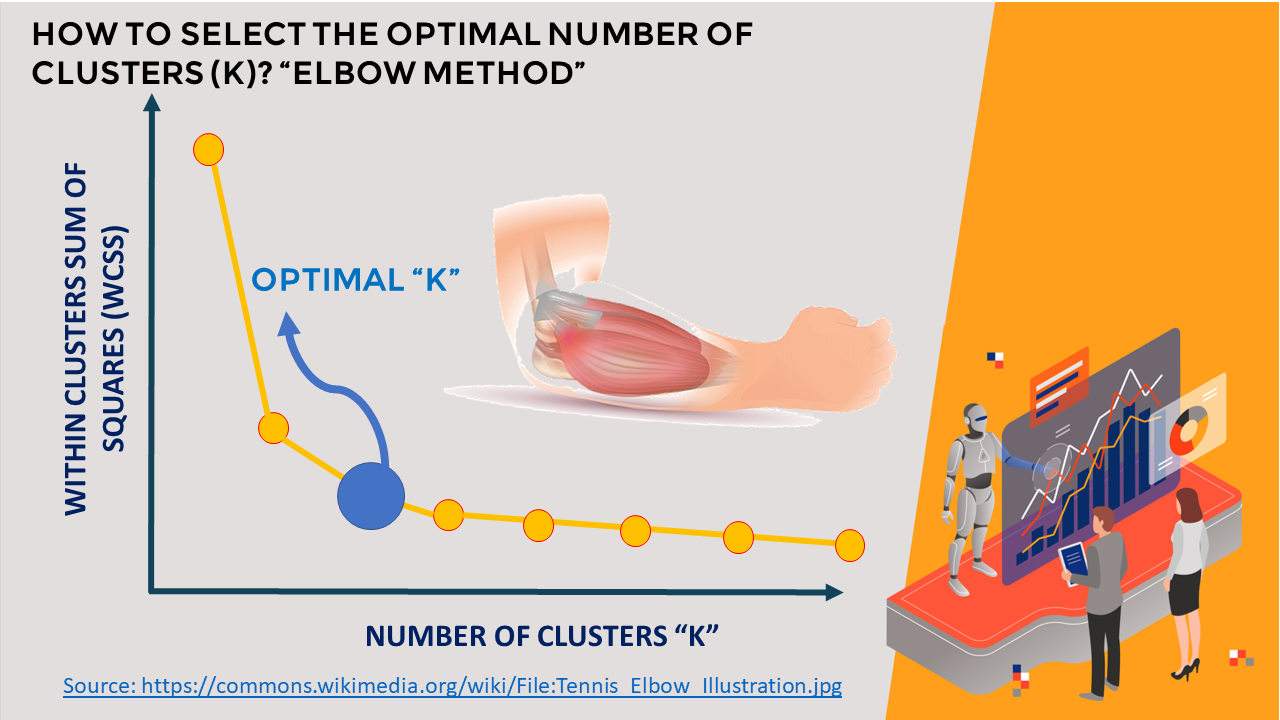

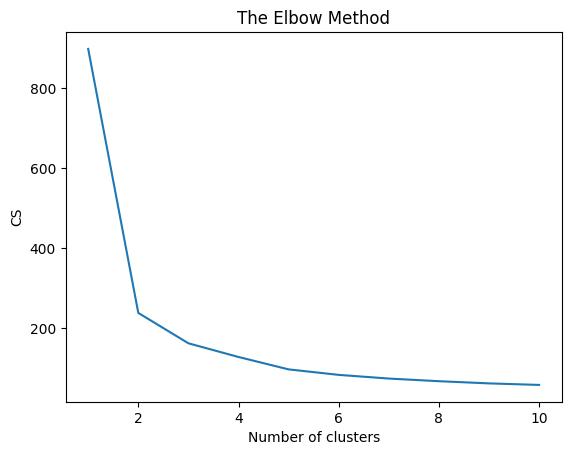

In [ ]:
from sklearn.cluster import KMeans

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,
                    random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

<b> <i>
- By the above plot, we can see that there is a kink at k=2.

- Hence k=2 can be considered a good number of the cluster to cluster this data.

- But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

- I will write the required code with k=2 again for convinience.

<b> K-Means model with different clusters

-
K-Means model with 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


<b> with 4 Clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


**We have achieved a relatively high accuracy of 62% with k=4.**

## <b> Results and conclusion
- In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

- I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

- I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

- I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

- So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

- Hence, we can conclude that k=4 being the optimal number of clusters.

## <B>References ¶

The work done in this project is inspired from following books and websites:-

Udemy course – Machine Learning –

https://en.wikipedia.org/wiki/K-means_clustering

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://www.datacamp.com/community/tutorials/k-means-clustering-python

https://www.datascience.com/blog/k-means-clustering

https://acadgild.com/blog/k-means-clustering-algorithm

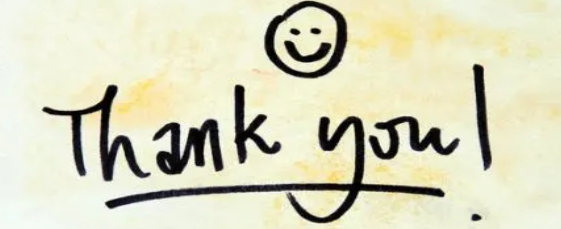